In [148]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [149]:
df_uber = pd.read_csv("Uber Drives - .csv")
df_uber.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [150]:
df_uber.rename(columns={'START_DATE*':'START_DATE','END_DATE*':'END_DATE','CATEGORY*':'CATEGORY','START*':'START','STOP*':'STOP','MILES*':'MILES','PURPOSE*':'PURPOSE'},inplace=True)

In [151]:
df_uber.shape

(1156, 7)

In [152]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [153]:
df_uber.isna().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [154]:
y = df_uber.PURPOSE
df_uber.drop(columns=['PURPOSE'],inplace=True)

df_uber.dropna(inplace=True)

df_uber['PURPOSE'] = y
df_uber.isna().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [155]:
df_uber.PURPOSE.value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

In [156]:
mode1 = df_uber.pivot_table(values='PURPOSE', columns='CATEGORY', aggfunc=(lambda x: x.mode()[0]))
mode1
missing_values = df_uber['PURPOSE'].isnull()
# missing_values
df_uber.loc[missing_values, 'PURPOSE'] = df_uber.loc[missing_values, 'CATEGORY'].apply(lambda x: mode1[x])

In [157]:
df_uber.shape

(1155, 7)

In [158]:
df_uber.PURPOSE.value_counts()

Meeting            618
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Moving              75
Temporary Site      50
Between Offices     18
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

In [159]:
df_uber['START_DATE'] = pd.to_datetime(df_uber['START_DATE'], format='%m/%d/%Y %H:%M')
df_uber['END_DATE'] = pd.to_datetime(df_uber['END_DATE'], format='%m/%d/%Y %H:%M')

In [160]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [161]:
dayofweek = []
weekday = []

for i in df_uber['START_DATE']:
    dayofweek.append(i.dayofweek)
    weekday.append(calendar.day_name[dayofweek[-1]])
    
df_uber['WEEKDAY'] = weekday

In [162]:
df_uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meeting,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday


Category Plot

<AxesSubplot:xlabel='CATEGORY', ylabel='Count'>

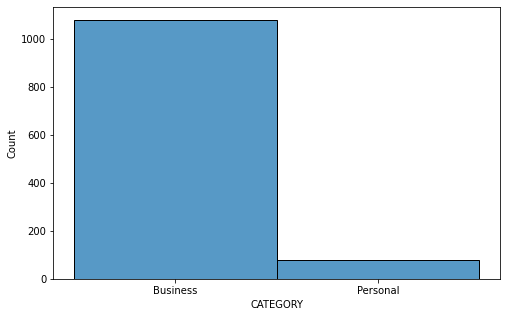

In [163]:
plt.figure(figsize=(8,5))
sns.histplot(df_uber['CATEGORY'])

How long do people travel with Uber?

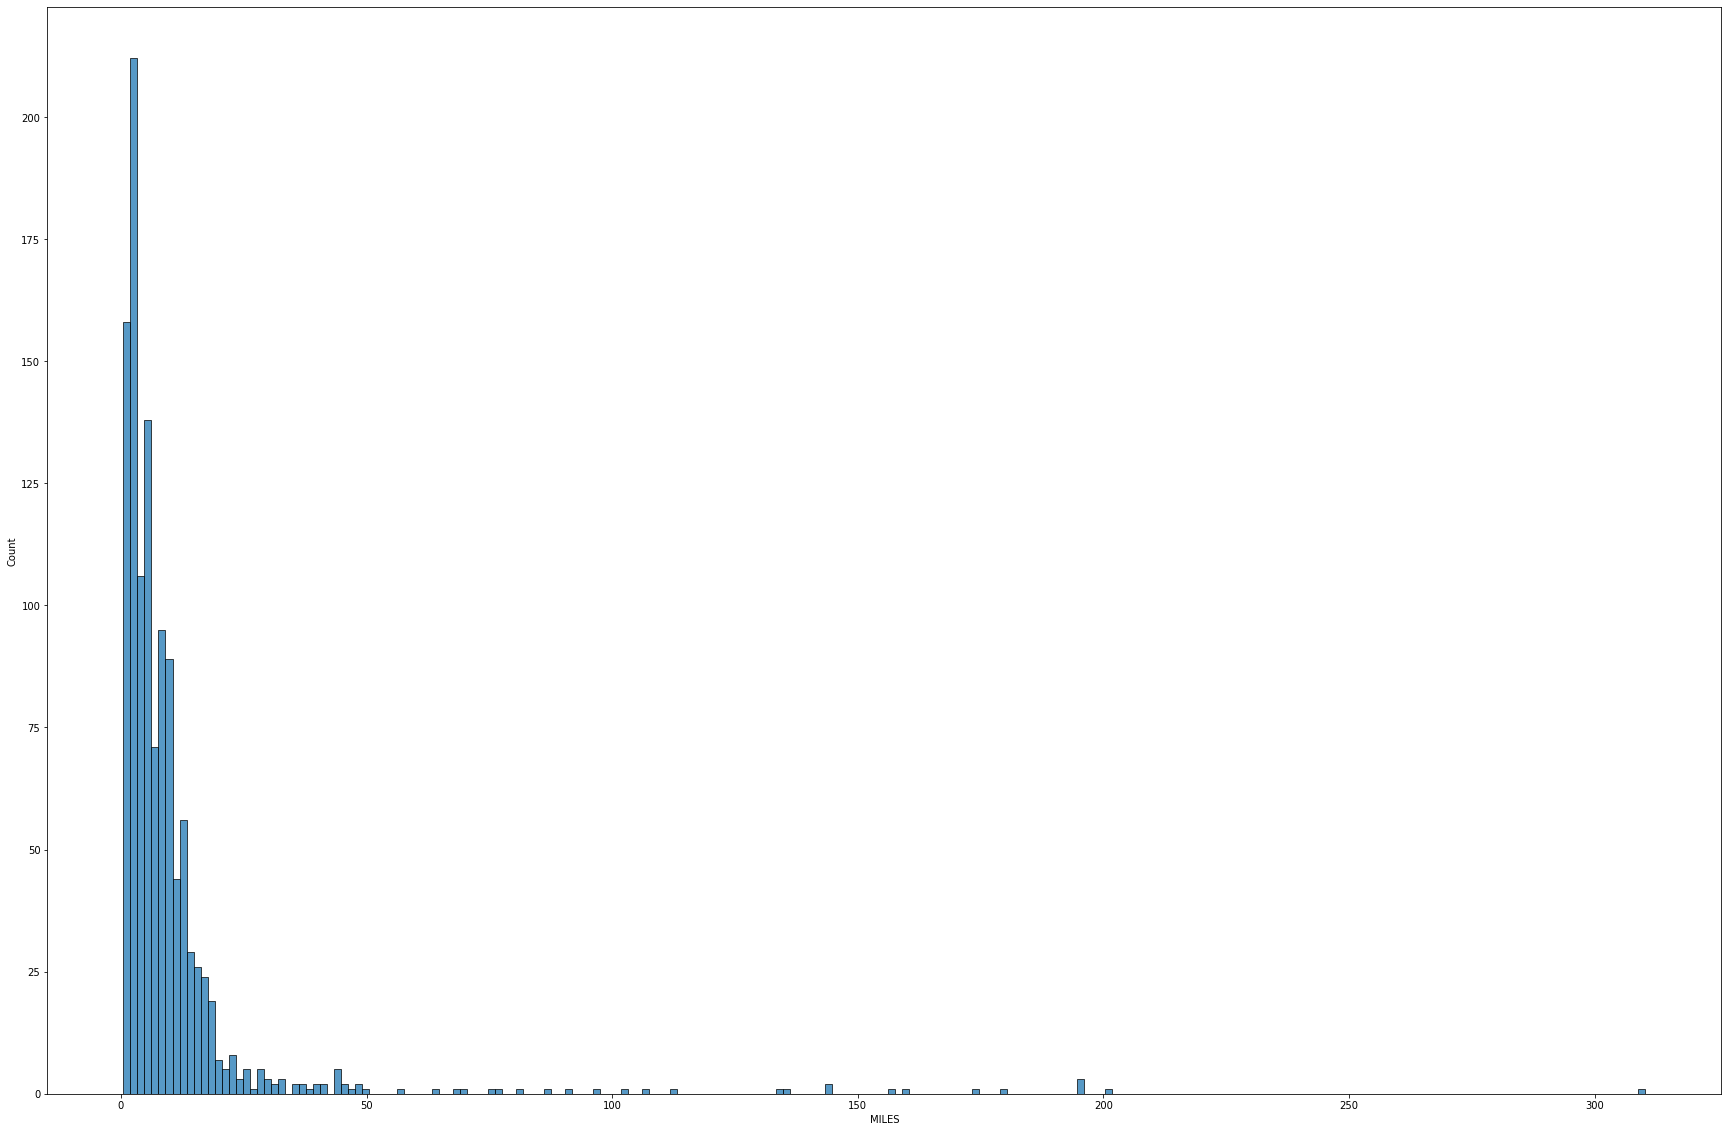

In [164]:
plt.figure(figsize=(30,20))
sns.histplot(df_uber['MILES'])
plt.show()
# df_uber['MILES'].plot.hist()

What hour do most people take Uber to their destination

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='START_DATE', ylabel='count'>

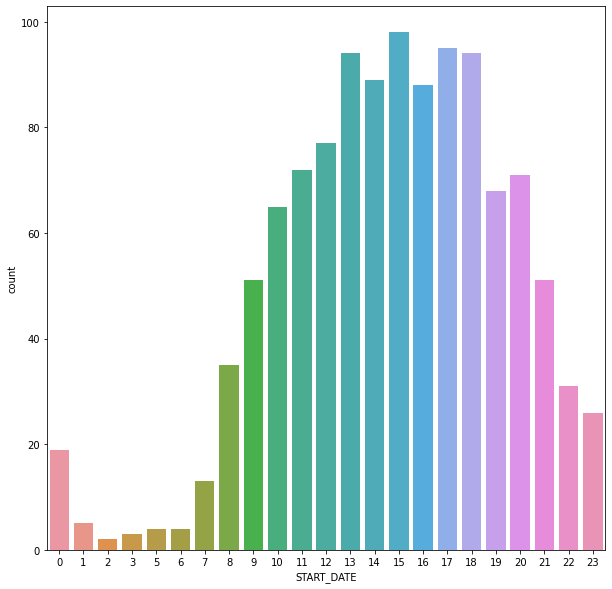

In [165]:
plt.figure(figsize=(10,10))
sns.countplot(df_uber['START_DATE'].dt.hour)
# h = df_uber['HOUR'].value_counts()
# h.plot(kind = 'bar')

Check the purpose of trip

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


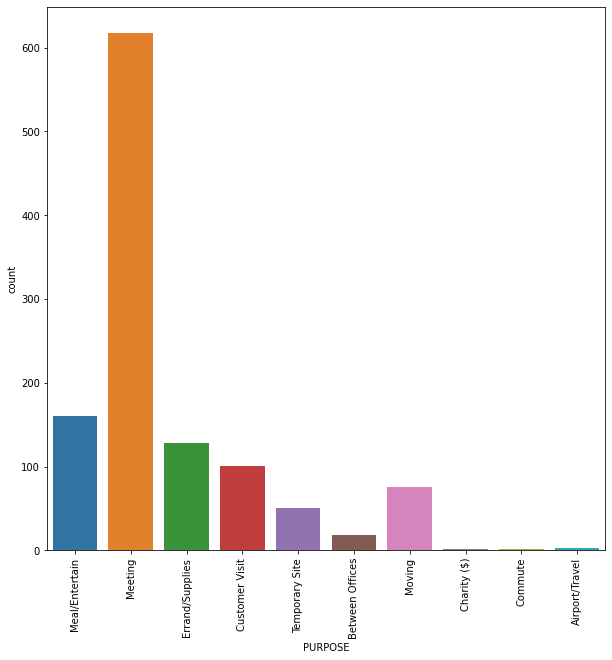

In [166]:
plt.figure(figsize=(10,10))
sns.countplot(df_uber['PURPOSE'])
plt.xticks(rotation = 90)
plt.show()
# df_uber['PURPOSE'].value_counts().plot(kind = 'bar')

Which day has the highest number of trips?

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


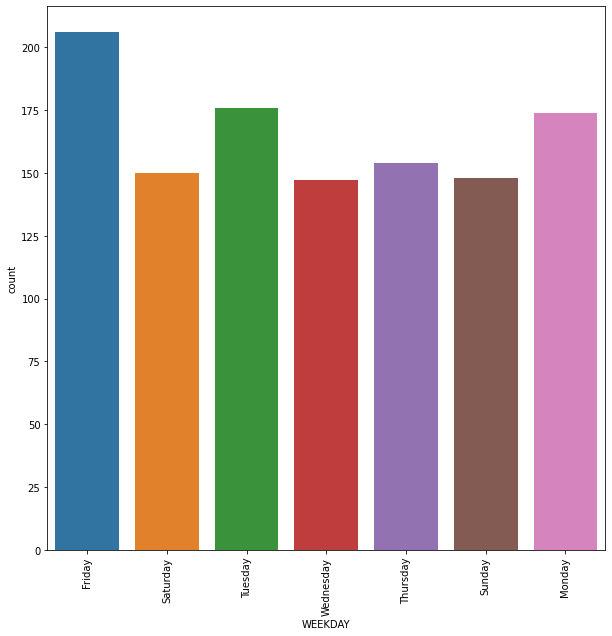

In [167]:
plt.figure(figsize=(10,10))
sns.countplot(df_uber['WEEKDAY'])
plt.xticks(rotation = 90)
plt.show()

What are number of trips each day?

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


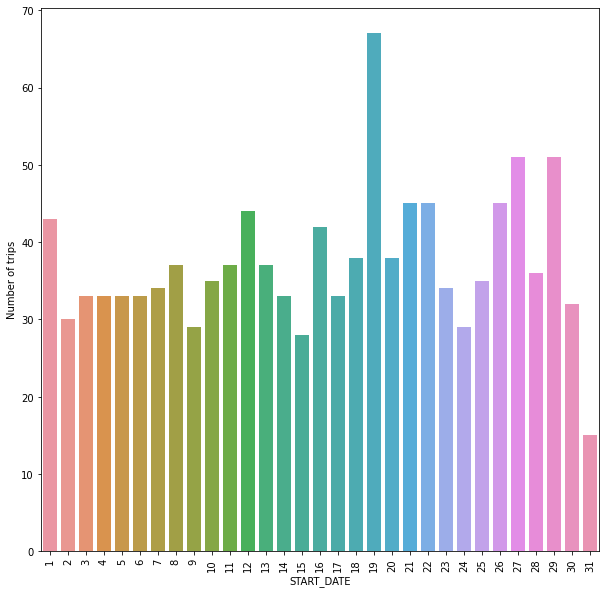

In [138]:
plt.figure(figsize=(10,10))
sns.countplot(df_uber['START_DATE'].dt.day)
plt.xticks(rotation = 90)
plt.ylabel('Number of trips')
plt.show()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


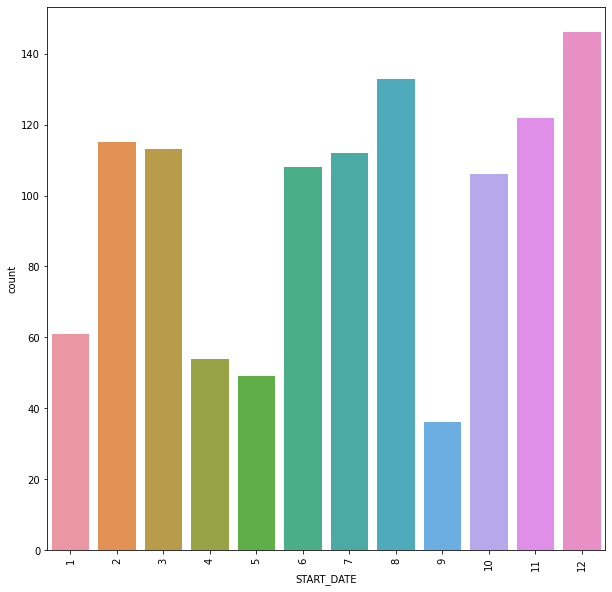

In [137]:
plt.figure(figsize=(10,10))
sns.countplot(df_uber['START_DATE'].dt.month)
plt.xticks(rotation = 90)
plt.show()

Starting point of Trip where most of the people board from?

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


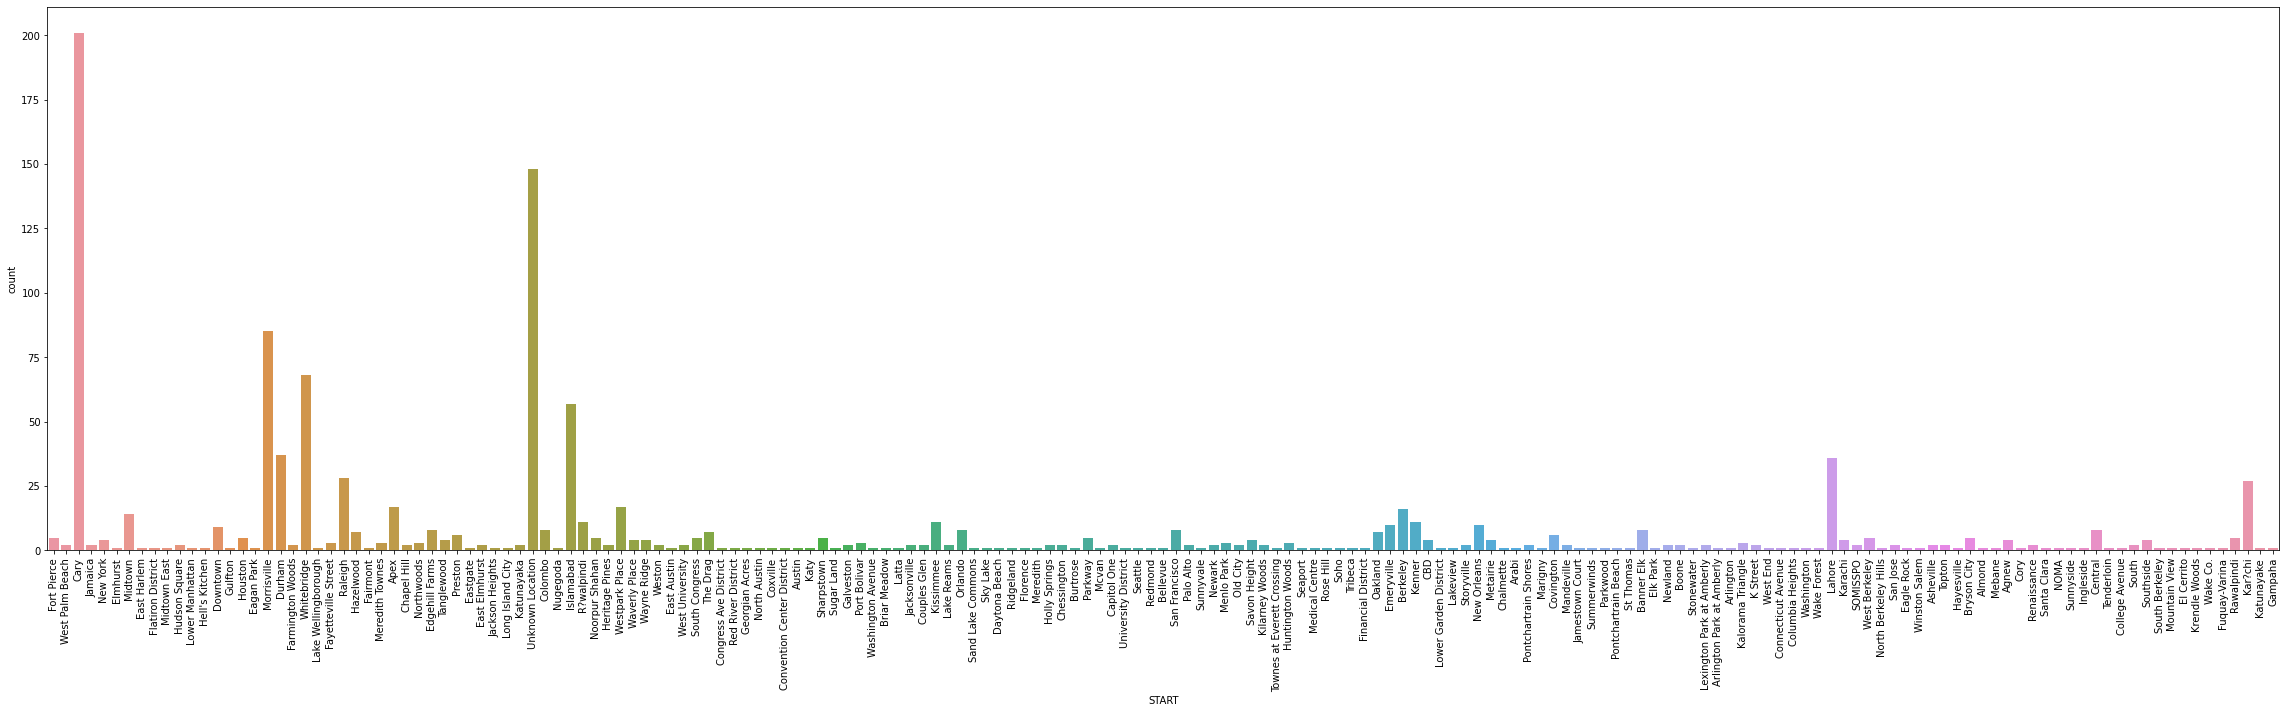

In [171]:
plt.figure(figsize=(40,10))
sns.countplot(df_uber['START'])
plt.xticks(rotation = 90)
plt.show()